# AI for Envinronmental Data Science 
## Workshop 1: Intro to LLMs & Prompting Fundamentals

*This notebook is the key for the demo presented in the workshop. Instructor notes and instructions are included in italics and as comments in code cells. Non-italicized text is intended for participants and included in the demo notebook that can be launched in binder.*

This activity introduces best practices for using Large Language Models (LLMs) effectively in the context of environmental data science. We will cover the basics of writing prompts and using [Claude](https://claude.ai/) to explain code outputs and generate code snippets for data analysis tasks. 

<!-- ADD LEARNING GOALS -->

This activity is motivated by Figure 1 of the [**Current State of Sea Ice Cover**](https://earth.gsfc.nasa.gov/cryo/data/current-state-sea-ice-cover).

![Figure 1 from Current State of Sea Ice Cover](NH_decadal_plot.png){width="60%"}

The demo consists of four parts:

- Part 1: Claude setup

- Part 2: Using genAI platforms to understand code 

- Part 3: Prompting to generate code

- Part 4: Prompting practice 


If you have GitHub Copilot enabled in your VSCode, please disable it for this demo.

## Data access

The data used for this activity is the [Bootstrap Sea Ice Concentrations from Nimbus-7 SMMR and DMSP SSM/I-SSMIS, Version 4](https://nsidc.org/data/nsidc-0079/versions/4#anchor-documentation) from the National Snow and Ice Data Center (NSIDC). The [user guide](https://nsidc.org/sites/default/files/documents/user-guide/nsidc-0079-v004-userguide.pdf) is available through the dataset main page. 

The data was donwloaded using a Python script generated by the [NSIDC Data Search Tool for this dataset](https://nsidc.org/data/data-access-tool/NSIDC-0079/versions/4). The script downloads all 2024 data (monthly and daily) for the Northern Hemisphere and only the data files needed for the activity are included in this repository. All data is in netCDF format and are stored in the `monthly_data` folder.

## Definitions

The [**Current State of Sea Ice Cover**](https://earth.gsfc.nasa.gov/cryo/data/current-state-sea-ice-cover) article defines sea ice concentration, extent, and area as follows:

>**Sea ice concentration** is the percent areal coverage of ice within the data element (grid cell). 

>**Sea ice extent** is the integral sum of the areas of all grid cells with at least 15% ice concentration, while **sea ice area** is the integral sum of the product of ice concentration and area of all grid cells with at least 15% ice concentration. 

## Part 1: Claude setup

The best practices recommended in this section are:

🌟 Set a system prompt to streamline the platform's responses across all interactions.

🌟 Always create a project with clear instructions to provide context for and improve the relevance of the platform's responses. Projects also help keep chats tidy.

🌟 Be cautious about uploading files into genAI platforms. Consider security issues for sensitive data and memory usage. 

🌟 If you do decide to upload files, consider sharing code snippets, metadata, or data samples instead of full files.


### 1. Setting a system prompt

Setting a system prompt will set Claude's behavior across all interactions. To specify the system prompt: 

1. Click your icon (bottom left) → **Settings**.
2. In the *"What personal preferences should Claude consider in responses?"* text box, enter:
   > Keep responses concise and challenge me when there's a better way to approach a problem. Avoid over-engineering. Only make changes that are directly requested or clearly necessary. Keep solutions simple and focused.

You can adjust this anytime. For more information, see the [Claude Docs](https://platform.claude.com/docs/en/build-with-claude/prompt-engineering/claude-4-best-practices).


### 2. Create a project for the analysis

1. In the left panel, click **Projects** → **New Project**. Name it *Sea Ice Extent Analysis* with this description:
   > Analyzing sea ice extent in the Northern Hemisphere across time using Bootstrap Sea Ice Concentrations data from the National Snow and Ice Data Center (NSIDC).

2. Add project instructions:
   > Provide code assistance for geospatial analysis to an intermediate Python programmer. Use well-established Python libraries with robust documentation (e.g., geopandas, xarray).

3. Skip file uploads. We will provide context through text as needed during analysis.

*Go to slides and show best practies*

## Part 2: Using genAI platforms to understand code 

The best practices recommended in this section are:

🌟 Before jumping right away into asking genAI tools for answers, take a moment to think about what you already know and possible solutions or explanations. This will give you something to compare the genAI outputs to and will build your problem-solving skills.

🌟 Use detailed prompts that provide context, variable names, and specific instructions to get the best results from genAI platforms.

🌟 Avoid adding unnecessary code or complexity to your workflow just because it was suggested.

🌟 Use the genAI outputs as a starting point and always complement it with and check it against your understanding of the problem, domain subject, and data. 

### Exploring sea ice concentration data for January 2024

We will use this information from the user guide for the rest of the activity:

*Have someone in the audience read this out loud.*

> **1.1 Parameters** The data set consists of sea ice concentration derived from gridded brightness temperatures. Historically – including previous versions of this data set – sea ice concentration was provided as “concentration” values ranging from 0 to 100 percent. Now the data are provided as the CF-compliant standard name “sea_ice_area_fraction” which ranges from 0 (meaning no sea ice) to 1 (meaning 100% sea ice cover). The **data are encoded in the NetCDF file as short (2-byte) integers with a scaling factor of 0.001, so the sea ice concentration values range from 0 to 1000 and thus have a precision of one tenth of a percent.** Two sentinel values –data values in the sea ice concentration field which are not sea ice concentrations– are also used: **A value of “1200” indicates that a pixel is primarily land or permanent ice-shelf (not water) and therefore would never have a sea ice concentration value. A value of “1100” indicates missing data**, e.g. some pixels near the North Pole are never measured because of the path of the observing satellite.

We also know from the user guide that the data is in a polar stereographic projection with a grid cell size of 25 km x 25 km.

We will start by loading in our data. At this point, we only have the libraries we know off the top of our head. If we need to import additional libraries suggested by genAI tools, we will come back and import them as we go along.


In [1]:
# -------- DEMO NOTEBOOK HAS THIS CELL  --------

import os
import xarray as xr

ice0124 = xr.open_dataset(os.path.join('monthly_data_2024', 'NSIDC0079_SEAICE_PS_N25km_202401_v4.0.nc'))
ice0124

<xarray.Dataset> Size: 1MB
Dimensions:     (time: 1, y: 448, x: 304)
Coordinates:
  * time        (time) datetime64[ns] 8B 2024-01-01
  * y           (y) float64 4kB 5.838e+06 5.812e+06 ... -5.312e+06 -5.338e+06
  * x           (x) float64 2kB -3.838e+06 -3.812e+06 ... 3.712e+06 3.738e+06
Data variables:
    F17_ICECON  (time, y, x) float64 1MB ...
    crs         |S1 1B ...
Attributes: (12/49)
    title:                     Bootstrap Sea Ice Concentrations from Nimbus-7...
    summary:                   These sea ice concentration data were derived ...
    id:                        10.5067/X5LG68MH013O
    license:                   Access Constraint: These data are freely, open...
    acknowledgment:            These data are produced by the NASA Cryospheri...
    metadata_link:             https://doi.org/10.5067/X5LG68MH013O
    ...                        ...
    geospatial_x_resolution:   25000.0 meters
    geospatial_y_resolution:   25000.0 meters
    geospatial_lat_min:        30.980564
    geospatial_lat_max:        90.0
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        180.0

*Allow for 2 minutes to explore the data and understand its structure.*
*Go to slides and show the questions while students look at the data.* 

Take some time to explore the dataset and answer the following questions about its structure and contents:

1. What are the dimensions, variables, and attributes of this dataset?
2. What is the spatial resolution of the data?
3. What is the name of the sea ice concentration variable?
4. What are the flag values and fill values used in this dataset and what do they represent?

Next, we will do some basic exploration of the sea ice concentration values.

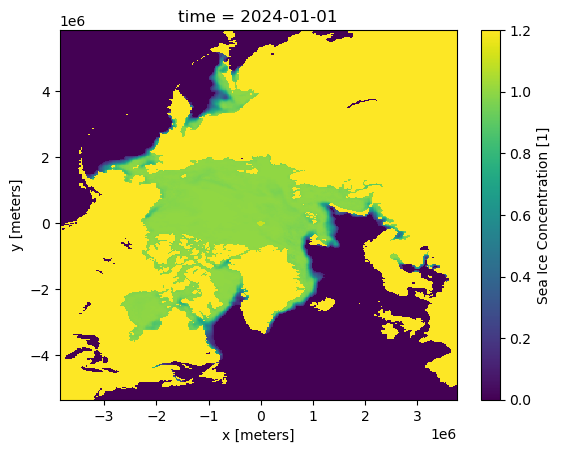

In [2]:
# Sea ice concentration map for January 2024
ice0124['F17_ICECON'].plot()

In [3]:
# Sea ice concentration values
ice0124['F17_ICECON'].values

array([[[0. , 0. , 0. , ..., 1.2, 1.2, 1.2],
        [0. , 0. , 0. , ..., 1.2, 1.2, 1.2],
        [0. , 0. , 0. , ..., 1.2, 1.2, 1.2],
        ...,
        [1.2, 1.2, 1.2, ..., 0. , 0. , 0. ],
        [1.2, 1.2, 1.2, ..., 0. , 0. , 0. ],
        [1.2, 1.2, 1.2, ..., 0. , 0. , 0. ]]])

<BarContainer object of 50 artists>

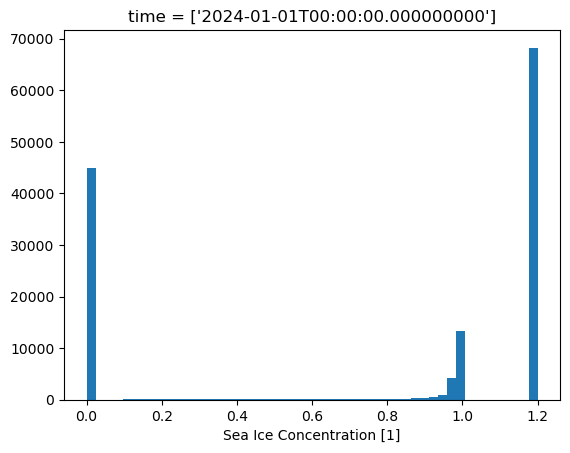

In [4]:
# Sea ice concentration distribution
ice0124['F17_ICECON'].plot.hist(bins=50)[2]

From this exploration we can see the the values range seems to be from 0 to 1.2 and there is a big number of 1.2 values. These might correspond to the 1200 missing data value mentioned in the documentation. It seems, overall, that the data has been scalled from [0,1000] to [0,1]. The user guide even mentions the data is "encoded" as short (2-byte) integers with a scaling factor of 0.001.  But we want to confirm whether scaling was actually applied. **Every time your data doesn't quite match the metadata or expected values, it is worth investigating why.** We will use Claude to help us understand what is going on here.

✋ **STOP AND THINK:**

 Before just jumping into Claude for answers by asking a low-energy question, take a minute to think about what might be going on and when did it occur. 
 
 *Think-pair-share.*


 The data got scaled somehow. The only thing that has happened is loading the data with `xarray`, so we are likely dealing with some kind of automatic scaling during data loading. Maybe there's some information in the dataset or variable attributes that can help us understand what is going on. 

Since both the dataset's and variable's attributes might contain useful information, let's extract them so we can provide them to Claude for context.


In [5]:
# Complete dataset attributes
print(ice0124.attrs)

{'title': 'Bootstrap Sea Ice Concentrations from Nimbus-7 SMMR and DMSP SSM/I-SSMIS', 'summary': "These sea ice concentration data were derived using measurements from the  Scanning Multichannel Microwave Radiometer (SMMR) on the Nimbus-7 satellite  and from the Special Sensor Microwave/Imager (SSM/I) sensors on the Defense  Meteorological Satellite Program's (DMSP) -F8, -F11, and -F13 satellites.  Measurements from the Special Sensor Microwave Imager/Sounder (SSMIS) aboard  DMSP-F17 are also included. The data set has been generated using the  Advanced Microwave Scanning Radiometer - Earth Observing System (AMSR-E)  Bootstrap Algorithm with daily varying tie-points. Daily (every other day  prior to July 1987) and monthly data are available for both the north and  south polar regions. Data are gridded on the SSM/I polar stereographic grid  (25 x 25 km).", 'id': '10.5067/X5LG68MH013O', 'license': 'Access Constraint: These data are freely, openly, and fully accessible, provided that you 

In [6]:
# Sea ice concentration variable attributes
print(ice0124['F17_ICECON'].attrs)

{'FillValue': 1100, 'coverage_content_type': 'image', 'grid_mapping': 'crs', 'units': '1', 'long_name': 'Sea Ice Concentration', 'standard_name': 'sea_ice_area_fraction', 'valid_range': array([   0, 1000], dtype=int16), 'flag_values': array([1100, 1200], dtype=int16), 'flag_meanings': 'missing land', 'packing_convention': 'netCDF', 'packing_convention_description': 'unpacked = scale_factor*packed + add_offset'}


*Move to Claude and ask the prompt in a new chat within the project*

This is an example of a detailed prompt that provides context and specific instructions:

>I am working with a NetCDF4 file with sea ice concentration data from the NSIDC for January 2024.  I have imported it as an xarray.DataSet using xarray. I have loaded in this data as the `ice0124` `xarray.DataSet`. These are the attributes for `ice0124` :

*Copy-paste attributes from the dataset.*

> The attributes for the `F17_ICECON` variable, which contains the sea ice concentration data are:

*Copy-paste attributes from the variable.*

> In the documentation for this dataset it mentions the data values go from 0 to 1000, with values of 1200 and 1100 indicating land and missing data respectively. When I load the data with xarray and look at the sea ice concentration values I see they go from 0 to 1.2 Can you help me understand what could be happening and how can I find information within the dataset about any scaling that may have been applied to the data when loading it with `xarray`?


*IMPORTANT NOTES HERE:*

*1. Provide context your dataset structure and attributes. Specifying variable names also helps the genAI produce code that matches what you are already doing.*

*2. You can paste code outputs as text into the prompt to provide more context.*

*3. I knew specifically what I am looking for: information about whether the data got scaled and how can I find that information in the dataset. So I specified that in the prompt.*

This is the output I got from Claude:

![](claude-answers/part1-answer1.png){width="60%"}

*NOTE FOR INSTRUCTORS*

*Claude's output will inevitably vary. The important part is that it indentifies the `encoding` for the variable. A bit of putting the pieces together may be needed to understand where evrything fits in.*

*The `scale_factor` and `add_offset` are actually in the `attributes` dictionary for the variable*

*Whatever the output, take this as an opportunity to show that an understanding of the data is needed to make sense of the genAI outputs.* 

*The goal is to understand that the data got scaled when loading it with `xarray` because of the `scale_factor` and `add_offset` in the variable's `encoding` attributes.*

In [7]:
# --------- Run and discuss Claude's ouput ---------

# Look at the actual variable attributes
print(ice0124['F17_ICECON'].encoding)

# Or check for these specific attributes
print(ice0124['F17_ICECON'].attrs.get('scale_factor'))
print(ice0124['F17_ICECON'].attrs.get('add_offset'))

{'dtype': dtype('int16'), 'zlib': True, 'szip': False, 'zstd': False, 'bzip2': False, 'blosc': False, 'shuffle': True, 'complevel': 4, 'fletcher32': False, 'contiguous': False, 'chunksizes': (1, 448, 304), 'preferred_chunks': {'time': 1, 'y': 448, 'x': 304}, 'source': '/Users/galaz-garcia/Documents/code-for-genAI-demo/monthly_data/NSIDC0079_SEAICE_PS_N25km_202401_v4.0.nc', 'original_shape': (1, 448, 304), 'scale_factor': 0.001, 'add_offset': 0.0, 'coordinates': 'time y x'}
None
None


In [8]:
# --------- Improve readability of the encoding output ---------
ice0124['F17_ICECON'].encoding

{'dtype': dtype('int16'),
 'zlib': True,
 'szip': False,
 'zstd': False,
 'bzip2': False,
 'blosc': False,
 'shuffle': True,
 'complevel': 4,
 'fletcher32': False,
 'contiguous': False,
 'chunksizes': (1, 448, 304),
 'preferred_chunks': {'time': 1, 'y': 448, 'x': 304},
 'source': '/Users/galaz-garcia/Documents/code-for-genAI-demo/monthly_data/NSIDC0079_SEAICE_PS_N25km_202401_v4.0.nc',
 'original_shape': (1, 448, 304),
 'scale_factor': 0.001,
 'add_offset': 0.0,
 'coordinates': 'time y x'}

In [9]:
# --------- Examine actual packing  ---------
print(ice0124['F17_ICECON'].encoding['scale_factor'])
print(ice0124['F17_ICECON'].encoding['add_offset'])
print(ice0124['F17_ICECON'].attrs['packing_convention_description'])


0.001
0.0
unpacked = scale_factor*packed + add_offset


After digging a bit through the data we can confirm that `xarray` applies the transformation indicated by the attributes by default, transforming the values range from [0,1200] to [0,1.2]. Working with values between 0 and 1 feels more intuitive than working since we will be using percentages, so we won't reverse the scaling or re-import the data without automatic scaling as Claude suggested. 

*Go to slides and show best practies*

## Part 3: Prompting to generate code
The best practices recommended in this section are:

🌟 Before running any of the genAI-generated code, go line by line through it and make sure you have a solid idea of what is happening.

🌟 Look for clarification on any pieces of code you do not understand through breaking down the code yourself, online documentation, or follow-up questions to the genAI platform.

🌟 Question whether all steps are necessary, correct, and safe: you may find places to streamline the code or even catch an error.

🌟 Focus on understanding and learning instead of simply obtaining results, this will help you write and read code with more ease as you go forward!

### Values distribution summary

Next, we want to understand the distribution of NA values and land values in the data through a summary. Let's say we want to use Claude to create a summary of the dataset contents. I used the following prompt:

> I will keep the ice0124with the scaling from 0 to 1. I am interested in understanding what percentage of my data is missing data, land, and actual data for sea ice concentration. Can you write code that prints out this information?

And got the following code:

In [10]:
# Get the sea ice concentration variable
ice_conc = ice0124['F17_ICECON']

# Count each category
total_pixels = ice_conc.size
missing_data = (ice_conc == 1.1).sum().item()
land = (ice_conc == 1.2).sum().item()
valid_data = ((ice_conc >= 0) & (ice_conc <= 1.0)).sum().item()

# Calculate percentages
missing_pct = (missing_data / total_pixels) * 100
land_pct = (land / total_pixels) * 100
valid_pct = (valid_data / total_pixels) * 100

# Print results
print(f"Total pixels: {total_pixels:,}")
print(f"\nValid sea ice data: {valid_data:,} ({valid_pct:.2f}%)")
print(f"Land: {land:,} ({land_pct:.2f}%)")
print(f"Missing data: {missing_data:,} ({missing_pct:.5f}%)")

Total pixels: 136,192

Valid sea ice data: 67,904 (49.86%)
Land: 68,264 (50.12%)
Missing data: 24 (0.01762%)


✋ STOP AND THINK: 

1. Go line by line through the code and make sure you understand what each line is doing and how. Ex: do you understand what `.item()` does? What does `:.2f%` mean in the f-string?
2. Do the outputs make sense given what you know about the data? Do these match the information you got form the plot and histogram earlier?
3. Is the code efficient and simple or are there unnecessary complexities? Is there a better way to do this? Be critical about the code you get from genAI tools!

If you are not sure how some of the code works, a good first step is to deconstruct it and run it piece-by-piece in the notebook to see intermediate outputs. You can also ask Claude follow-up questions to clarify specific parts of the code. Let's see each of these strategies:

Let's say we want to understand what the line `missing_data = (ice_conc == 1.1).sum().item()` does. We can run it piece by piece:

In [11]:
# An xarray.DataArray of boolean values where True indicates a cell with a value of 1.1
ice_conc == 1.1

<xarray.DataArray 'F17_ICECON' (time: 1, y: 448, x: 304)> Size: 136kB
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * time     (time) datetime64[ns] 8B 2024-01-01
  * y        (y) float64 4kB 5.838e+06 5.812e+06 ... -5.312e+06 -5.338e+06
  * x        (x) float64 2kB -3.838e+06 -3.812e+06 ... 3.712e+06 3.738e+06

In [12]:
# The number of cells with a value of 1.1: each True value counts as 1
(ice_conc == 1.1).sum()

<xarray.DataArray 'F17_ICECON' ()> Size: 8B
array(24)

In [13]:
# Retrieve the number of missing data cells as a standard Python integer instead of an xarray.DataArray
(ice_conc == 1.1).sum().item()

24

*Demonstrate how it would look like to look into the documentation.*
https://docs.xarray.dev/en/stable/generated/xarray.DataArray.item.html

*Demonstrate how it would look like to ask a follow-up question to Claude about this same piece of code.*

### Sea ice extent calculation for January 2024

Finally, we want to calculate the sea ice extent for January 2024. For this, we need to calculate the area of all grid cells with at least 15% sea ice concentration. Given that our data is scaled from 0 to 1, this means we need to consider all grid cells with values greater than or equal to 0.15.

Let's ask Claude to help us with this as well using the following prompt:

> I want to calculate sea ice extent. This is the total area of  all grid cells with at least 15% sea ice concentration in the dataset. Write code for this and print the result.


In [14]:
# Calculate sea ice extent
grid_cell_area = 25000 * 25000  # 25km x 25km in square meters
cells_with_ice = ((ice0124['F17_ICECON'] >= 0.15) & (ice0124['F17_ICECON'] <= 1.0)).sum().item()
sea_ice_extent_km2 = (cells_with_ice * grid_cell_area) / 1e6  # Convert to km²

# Print result
print(f"Sea ice extent: {sea_ice_extent_km2:,.0f} km²")

Sea ice extent: 14,193,750 km²


This code is easy to understand and the calculation is correct. However, notice it calculates the cell area in square meters to then convert back to square kilometers. We could have just calculated the area in square kilometers directly by using 25 km x 25 km = 625 km² as the area per grid cell. Let's simplify the code accordingly:

In [15]:
# Calculate sea ice extent
grid_cell_area = 25 * 25  # 25km x 25km 
cells_with_ice = ((ice0124['F17_ICECON'] >= 0.15) & (ice0124['F17_ICECON'] <= 1.0)).sum().item()
sea_ice_extent_km2 = (cells_with_ice * grid_cell_area)  

# Print result
print(f"Sea ice extent: {sea_ice_extent_km2:,.0f} km²")

Sea ice extent: 14,193,750 km²


### Monthly sea ice extent in 2024

Finally, we want to repeat the sea ice extent calculation for all months in 2024. 

We will use a more detailed prompt with specific instrucitons and enough information about our file structure to get the code we need in one go:

>I have one NetCDF with sea ice concentration data per month in a directory called monthly_data. The files have the names NSIDC0079_SEAICE_PS_N25km_2024*.nc where the * is a two-digit code for the month. So, fore example, the January 2024 sea ice concentration data has the filename NSIDC0079_SEAICE_PS_N25km_20201.nc . 
I want to use these files to 
1. Import them into my work environment
2. Calculate the sea ice extent in every month and then
3. Create a line plot depicting variation in sea ice extent per month.
Create code for this.

The code I got:

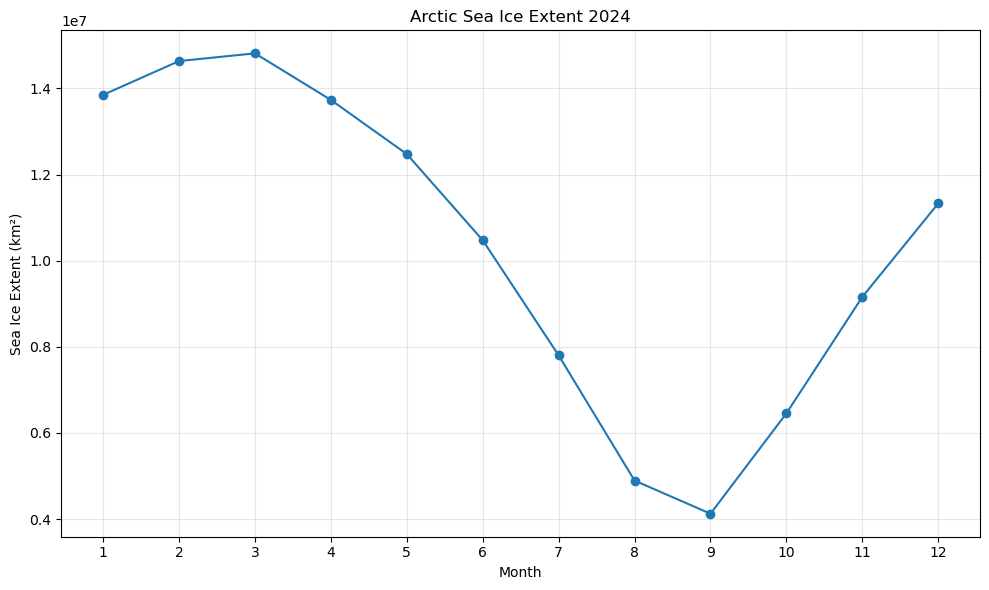

In [16]:
import matplotlib.pyplot as plt
from pathlib import Path

# Import all monthly files
data_dir = Path('monthly_data')
files = sorted(data_dir.glob('NSIDC0079_SEAICE_PS_N25km_2024*.nc'))
datasets = [xr.open_dataset(f) for f in files]

# Calculate sea ice extent for each month
grid_cell_area = 25000 * 25000  # 25km x 25km in square meters
extents = []

for ds in datasets:
    cells_with_ice = ((ds['F17_ICECON'] >= 0.25) & (ds['F17_ICECON'] <= 1.0)).sum().item()
    extent_km2 = (cells_with_ice * grid_cell_area) / 1e6
    extents.append(extent_km2)

# Create line plot
months = range(1, len(extents) + 1)
plt.figure(figsize=(10, 6))
plt.plot(months, extents, marker='o')
plt.xlabel('Month')
plt.ylabel('Sea Ice Extent (km²)')
plt.title('Arctic Sea Ice Extent 2024')
plt.grid(True, alpha=0.3)
plt.xticks(months)
plt.tight_layout()
plt.show()

🚧 Always follow best coding practices. Remember all libraries should be imported at the top of your notebook. 

*Go back to slides to show best practices for Part 3.*

## Part 4: Prompting practice

**TODO**

> Question for Kat and Sam: do we want to include an example of asking follow-up questions to Claude to clarify code? + Looking at the documentation.

- Review part 3 and add more details
- Add exercise for part 4: multi-year calculation + more graphics